In [1]:
import pandas as pd
import time
import datetime


In [2]:
df = pd.read_json('runpod-1701289860_raw.json')

In [3]:
# This is the standard analysis we would do in the real script

print('Validity results:')
print(df['valid'].value_counts())
cdf = df[df.valid !='Exception'].copy()
print(f'Clean DF is: {len(cdf)}')
cdf['inter_tokens_delay'] = cdf.total_time/cdf.tokens_out
cdf['total_tokens_per_s'] = (cdf.tokens_out + cdf.tokens_in)/cdf.total_time
cdf['out_tokens_per_s'] = cdf.tokens_out/cdf.total_time
mean_tokens_in = cdf['tokens_in'].mean() 
mean_tokens_out = cdf['tokens_out'].mean() 
mean_ttft = cdf['ttft'].mean()
gt_3_ttft = len(cdf[cdf['ttft'] > 3])/len(cdf)
print(f'Mean TTFT: {mean_ttft*1000:.0f} ms (mean tokens in: {mean_tokens_in:.0f}, out: {mean_tokens_out:.0f})')
print(f'TTFT > 3 s: {gt_3_ttft*100:.2f}%')
print(f'ITL (out): {cdf.inter_tokens_delay.mean()*1000:.2f} ms/token, mean tokens/s output (out): {cdf.out_tokens_per_s.mean():.2f} token/s')


Validity results:
valid
Mismatch    20
Name: count, dtype: int64
Clean DF is: 20
Mean TTFT: 22526 ms (mean tokens in: 509, out: 95)
TTFT > 3 s: 100.00%
ITL (out): 253.15 ms/token, mean tokens/s output (out): 7.87 token/s


In [4]:
len(cdf)

20

<Axes: xlabel='tokens_in', ylabel='ttft'>

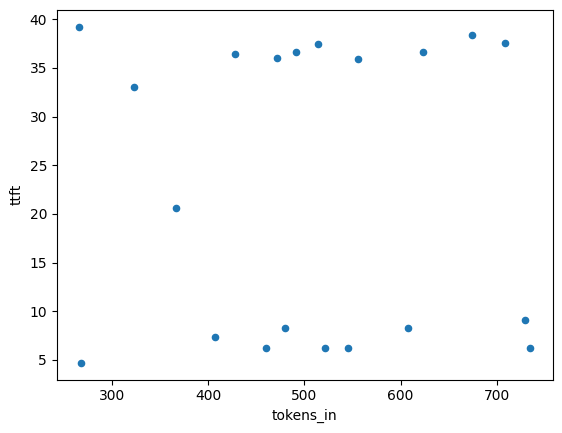

In [5]:
cdf.plot.scatter(y='ttft', x='tokens_in')

<Axes: xlabel='tokens_out', ylabel='total_time'>

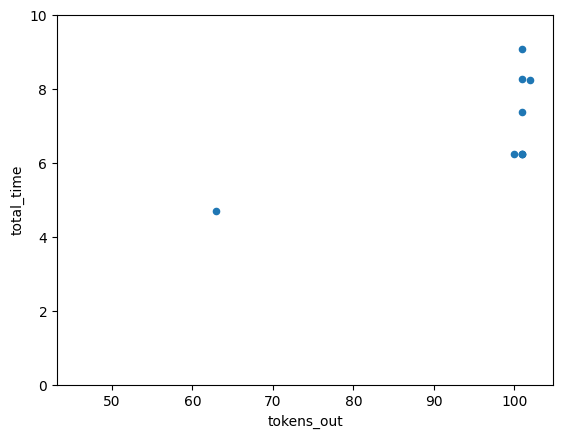

In [6]:
cdf.plot.scatter(y='total_time', x='tokens_out', ylim=[0,10])

In [7]:
cdf.describe()

,ttft,total_time,tokens_in,tokens_out,id,inter_tokens_delay,total_tokens_per_s,out_tokens_per_s
count,20.000000,20.000000,20.000000,20.000000,0.0,20.000000,20.000000,20.000000
mean,22.526078,22.526115,508.700000,94.600000,NaN,0.253146,49.978560,7.865819
std,14.948660,14.948653,142.777007,15.802731,NaN,0.192684,40.048661,6.023346
min,4.699680,4.699699,266.000000,46.000000,NaN,0.061690,9.357762,1.393575
25%,7.083717,7.083768,422.750000,100.750000,NaN,0.074174,16.255528,2.678279
50%,26.801028,26.801059,502.500000,101.000000,NaN,0.279825,22.121931,3.857699
75%,36.645980,36.646010,611.750000,101.000000,NaN,0.373393,86.891804,13.483223
max,39.218749,39.218781,735.000000,102.000000,NaN,0.717579,133.914178,16.210207


<Axes: ylabel='Frequency'>

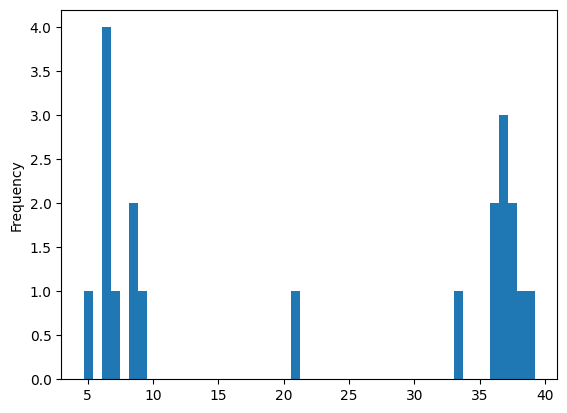

In [8]:
cdf['ttft'].plot.hist(bins=50)

In [9]:
list(df[df['valid'] == 'OK']['cause'].to_numpy())

[]